# Linear regression for inpainting one pixel an image using tensorflow 1

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib as plt
from data_generators import gen_frm_pic
from util_functions import util_functions

INDEX_TRGT = 4
INDEX_END = 8
ROW_SHAPE = (1,9)

Instructions for updating:
non-resource variables are not supported in the long term


## Generate images data

In [2]:
data,data_test = gen_frm_pic.generate()
data[0]

array([[[11, 13,  0],
        [25, 26,  0],
        [48, 49,  7]],

       [[25, 27,  5],
        [40, 39,  8],
        [55, 56, 12]],

       [[42, 42, 16],
        [55, 55, 21],
        [63, 62, 18]]], dtype=uint8)

## Split each pixel data to RGB channels

In [3]:
# red channel data
r_data = []

# green channel data
g_data = []

# blue channel data
b_data = []


for image in data:
    
    r_temp=[]
    b_temp=[]
    g_temp=[]
    for i in range(3):
        for j in range(3):
            r_temp.append(image[i][j][0])
            b_temp.append(image[i][j][1])
            g_temp.append(image[i][j][2])
    r_array=np.asarray(r_temp)
    g_array=np.asarray(r_temp)
    b_array=np.asarray(r_temp)
    util_functions.swap(r_array,INDEX_TRGT,INDEX_END)
    util_functions.swap(g_array,INDEX_TRGT,INDEX_END)
    util_functions.swap(b_array,INDEX_TRGT,INDEX_END)
    r_data.append(r_array)
    g_data.append(g_array)
    b_data.append(b_array)
    
r_test = []
g_test = []
b_test = []

for image in data_test:
    r_temp=[]
    b_temp=[]
    g_temp=[]
    for i in range(3):
        for j in range(3):
            r_temp.append(image[i][j][0])
            b_temp.append(image[i][j][1])
            g_temp.append(image[i][j][2])
    r_array=np.asarray(r_temp)
    g_array=np.asarray(b_temp)
    b_array=np.asarray(g_temp)
    util_functions.swap(r_array,INDEX_TRGT,INDEX_END)
    util_functions.swap(g_array,INDEX_TRGT,INDEX_END)
    util_functions.swap(b_array,INDEX_TRGT,INDEX_END)
    r_test.append(r_array)
    g_test.append(g_array)
    b_test.append(b_array)
    
data = [r_data, g_data, b_data]
test = [r_test, g_test, b_test]

## Split data to train, test and vailation data

In [4]:
# for red channel
train_r_data = r_data[0:600]
valid_r_data = r_data[600:800]

# for green channel
train_g_data = g_data[0:600]
valid_g_data = r_data[600:800]

# for blue channel
train_b_data = b_data[0:600]
valid_b_data = b_data[600:800]


In [5]:
# prepering the data
x_train_r = []
x_train_g = []
x_train_b = []

y_train_r = []
y_train_g = []
y_train_b = []

x_test_r = []
x_test_g = []
x_test_b = []

y_test_r = []
y_test_g = []
y_test_b = []

for i in range(600):
    
    x_train_r.append(train_r_data[i][0:INDEX_END].tolist())
    y_train_r.append([train_r_data[i][INDEX_END]])
for i in range(len(r_test)):
    
    x_test_r.append(r_test[i][0:INDEX_END].tolist())
    x_test_g.append(g_test[i][0:INDEX_END].tolist())
    x_test_b.append(b_test[i][0:INDEX_END].tolist())

    y_test_r.append([r_test[i][INDEX_END]])
    y_test_g.append([g_test[i][INDEX_END]])
    y_test_b.append([b_test[i][INDEX_END]])

x_trainers = [x_train_r,x_train_g,x_train_b]
y_trainers = [y_train_r,y_train_g,y_train_b]
x_testers = [x_test_r,x_test_g,x_test_b]
y_testers = [y_test_r,y_test_g,y_test_b]


## Model

In [6]:
data_x = np.array(x_trainers[0][0:1000])
data_y = np.array(y_trainers[0][0:1000])
plot_loss = []
features = 8

x = tf.placeholder(tf.float32, [None, features])
y_ = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.zeros([features, 1]))
b = tf.Variable(tf.zeros([1]))
y = tf.matmul(x,W) + b
loss = tf.reduce_mean(tf.pow(y - y_, 2))
update = tf.train.GradientDescentOptimizer(0.00001).minimize(loss) 
sess = tf.Session()
sess.run(tf.global_variables_initializer())

weights = []

In [7]:
data_x[0:10]

array([[11, 25, 48, 25, 63, 55, 42, 55],
       [68, 73, 66, 66, 65, 65, 66, 71],
       [56, 47, 41, 55, 33, 37, 54, 44],
       [37, 33, 30, 32, 19, 23, 27, 21],
       [32, 27, 20, 22, 15, 16, 16, 14],
       [17, 17, 18, 17, 26, 22, 18, 22],
       [19, 20, 16, 24, 23, 20, 28, 28],
       [17, 20, 22, 19, 26, 22, 21, 22],
       [20, 18, 20, 25, 26, 22, 31, 29],
       [25, 40, 71, 23, 27, 47, 25, 22]])

## Print loss

In [8]:
for i in range(0,10000):
    sess.run(update, feed_dict = {x:data_x, y_:data_y})
    weights.append(sess.run(W))
    if i > 40:
        plot_loss.append(loss.eval(session=sess, feed_dict = {x:data_x, y_:data_y}))
print('loss:', np.sqrt(loss.eval(session=sess, feed_dict = {x:data_x, y_:data_y})))

loss: 1.9817472


The following is a graph of the loss function over the training

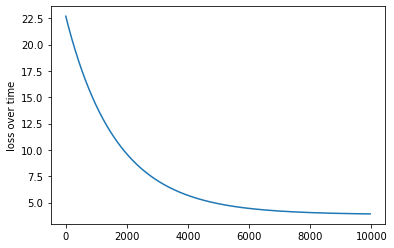

In [9]:
plt.pyplot.ylabel('loss over time')
plt.pyplot.plot(plot_loss)

[0.03662412 0.21732414 0.02076254 0.23551531 0.0385844  0.2385126
 0.03095188 0.18954639]


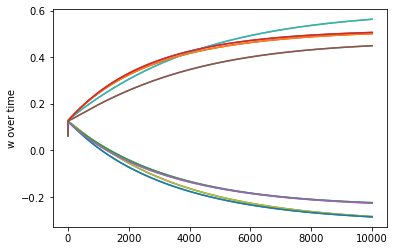

In [10]:
d = np.array(np.array(weights).transpose()[0]).transpose()
print(d[900])
plt.pyplot.plot(d)
plt.pyplot.ylabel('w over time')
plt.pyplot.plot(d)

## Using the validation data to print loss (Squared Vailidation Error)

In [11]:
valid_x_r = []
valid_y_r = []
for i in range(len(valid_r_data)):
    valid_x_r.append(valid_r_data[i][0:INDEX_END].tolist())
    valid_y_r.append([valid_r_data[i][INDEX_END].tolist()])
valid_x_g = []
valid_y_g = []
for i in range(len(valid_g_data)):
    valid_x_g.append(valid_g_data[i][0:INDEX_END].tolist())
    valid_y_g.append([valid_g_data[i][INDEX_END].tolist()])
valid_x_b = []
valid_y_b = []
for i in range(len(valid_g_data)):
    valid_x_b.append(valid_b_data[i][0:INDEX_END].tolist())
    valid_y_b.append([valid_b_data[i][INDEX_END].tolist()])

print("sqaured validation error on the red channel:", np.sqrt(loss.eval(session=sess, feed_dict = {x:valid_x_r, y_:valid_y_r})))
print("sqaured validation error on the green channel:", np.sqrt(loss.eval(session=sess, feed_dict = {x:valid_x_g, y_:valid_y_g})))
print("sqaured validation error on the blue channel:", np.sqrt(loss.eval(session=sess, feed_dict = {x:valid_x_b, y_:valid_y_b})))

sqaured validation error on the red channel: 1.6613697
sqaured validation error on the green channel: 1.6613697
sqaured validation error on the blue channel: 1.6613697


In [12]:

print("sqaured test error on the red channel:", np.sqrt(loss.eval(session=sess, feed_dict = {x:x_testers[0], y_:y_testers[0]})))
print("sqaured test error on the green channel:", np.sqrt(loss.eval(session=sess, feed_dict = {x:x_testers[1], y_:y_testers[1]})))
print("sqaured test error on the blue channel:", np.sqrt(loss.eval(session=sess, feed_dict = {x:x_testers[2], y_:y_testers[2]})))



sqaured test error on the red channel: 5.3411293
sqaured test error on the green channel: 5.318403
sqaured test error on the blue channel: 5.321884


In [13]:

# predicting for the test set
x_testers[0][0] = x_testers[0][0][0:8]
x_testers[1][0] = x_testers[1][0][0:8]
x_testers[2][0] = x_testers[2][0][0:8]
arr_r = np.asarray(x_testers[0])
arr_g =  np.asarray(x_testers[1])
arr_b =  np.asarray(x_testers[2])
p_r = sess.run(tf.nn.relu(np.matmul(arr_r,sess.run(W))+sess.run(b)))
p_g = sess.run(tf.nn.relu(np.matmul(arr_g,sess.run(W))+sess.run(b)))
p_b = sess.run(tf.nn.relu(np.matmul(arr_b,sess.run(W))+sess.run(b)))


In [14]:
matrices = []
for i in range(len(arr_r)):
    temp_r = arr_r[i].tolist()
    temp_g = arr_g[i].tolist()
    temp_b = arr_b[i].tolist()
    temp_r.append(int(p_r[i][0]))
    temp_g.append(int(p_g[i][0]))
    temp_b.append(int(p_b[i][0]))
    util_functions.swap(temp_r,INDEX_TRGT,INDEX_END)
    util_functions.swap(temp_g,INDEX_TRGT,INDEX_END)
    util_functions.swap(temp_b,INDEX_TRGT,INDEX_END)
    temp_r = np.reshape(np.asarray(temp_r,np.uint8),(3,3))
    temp_g = np.reshape(np.asarray(temp_r,np.uint8),(3,3))
    temp_b = np.reshape(np.asarray(temp_r,np.uint8),(3,3))
    matrix = np.asarray([temp_r,temp_g,temp_b])
    matrices.append(matrix)
len(matrices)
matrices[0]
    

array([[[ 42,  35,  29],
        [103,  76,  45],
        [185, 164, 132]],

       [[ 42,  35,  29],
        [103,  76,  45],
        [185, 164, 132]],

       [[ 42,  35,  29],
        [103,  76,  45],
        [185, 164, 132]]], dtype=uint8)

## Saving result to an images

In [15]:
from PIL import Image as mg

dt = matrices
i = 0
lines = []
i += 1
size = len(data[0][0])
data_size = 400
size = 3

for _ in range(1, data_size, size):
    concat = dt[i]
    for _ in range(1, data_size + size, size):
        pixel = dt[i]
        concat = np.concatenate((concat, pixel), axis=1)
        i += 1
    lines.append(concat)

concat = lines[0]
for i in range(1, len(lines)):
    concat = np.concatenate((concat, lines[i]), axis=0)

im = mg.fromarray(concat,'RGB')
im.save("images/output_image_p1.jpeg")